## Data Analysis Assignment

We studied the how GDP and usage of renewables affect the emission of carbon dioxide.    
All of our data are obtained from https://data.wordbank.org

### 1.Read data from csv file downloaded from World Bank Open Data
For simplicity, we only use data of US., ranging from 1960 to 2014.

In [275]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

rnwx = pd.read_csv(r'RNWX.csv',skiprows=4)
rnwx.set_index('Country Name',inplace=True)
US_rnwx = rnwx.loc['United States']
US_rnwx.drop(labels=['Country Code','Indicator Name','Indicator Code'],inplace=True)

GDP = pd.read_csv(r'GDP.csv',skiprows=4)
GDP.set_index('Country Name',inplace=True)
US_GDP = GDP.loc['United States']
US_GDP.drop(labels=['Country Code','Indicator Name','Indicator Code'],inplace=True)

CO2 = pd.read_csv(r'CO2.csv',skiprows=4)
CO2.set_index('Country Name',inplace=True)
US_CO2 = CO2.loc['United States']
US_CO2.drop(labels=['Country Code','Indicator Name','Indicator Code'],inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:2184: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(result)


Put all the data into a pandas DataFrame, and add the constant term:

In [276]:
df = pd.DataFrame({'rnwx':US_rnwx,'GDP':US_GDP,'CO2':US_CO2},dtype='float64')
df.reset_index(inplace=True)
df['constant'] = 1

### 2.Plot the data

First, we draw 3 bar plots to show their trends in the past 50 years

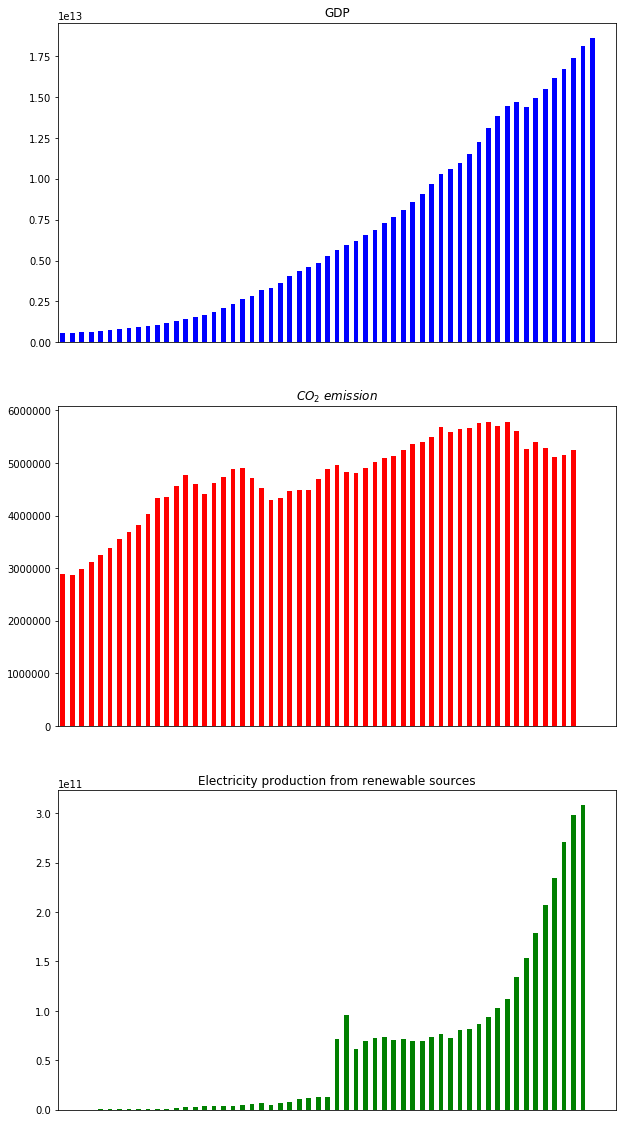

In [283]:
fig,axes = plt.subplots(3,1,figsize=(10,20))
df['CO2'].plot(kind='bar',ax=axes[1],color='red')
df['GDP'].plot(kind='bar',ax=axes[0],color='blue')
df['rnwx'].plot(kind='bar',ax=axes[2],color='green')
for i in range(3):
    axes[i].set_xticks([])
    axes[i].set_xlabel('')
    
axes[0].set_title('GDP')
axes[1].set_title('$CO_2 \\ emission$')
axes[2].set_title('Electricity production from renewable sources')
plt.show()

To further understand the relationships between these variables, we draw 2 scatter plots additionally:

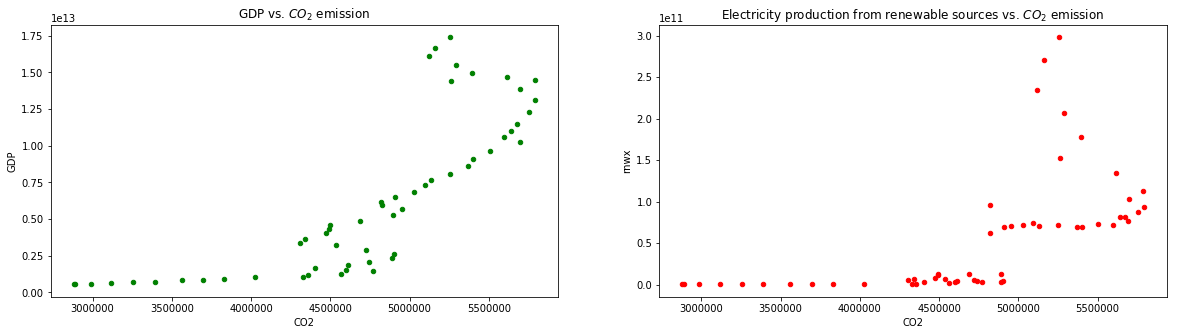

In [279]:
fig,axes = plt.subplots(1,2,figsize=(20,5))
df.plot(x='CO2',y='GDP',kind='scatter',c='green',ax=axes[0])
df.plot(x='CO2',y='rnwx',kind='scatter',c='red',ax=axes[1])
axes[0].set_title('GDP vs. $CO_2$ emission')
axes[1].set_title('Electricity production from renewable sources vs. $CO_2$ emission')
plt.show()

### 3.Implement regression

The regression function can be stated as:
$$CO_2=\beta_0 + \beta_1 GDP+\beta_2 rnwx$$
We make the following hypothesis:  
GDP has a positive effect on the emission of CO2 and the usage of renewables has a negative effect on the emission of CO2.

In [282]:
reg = sm.OLS(endog=df['CO2'],exog=df[['constant','GDP','rnwx']],missing='drop')
results = reg.fit(cov_type='HC0')
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    CO2   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     63.32
Date:                Sun, 28 Jan 2018   Prob (F-statistic):           1.16e-14
Time:                        20:48:27   Log-Likelihood:                -788.68
No. Observations:                  55   AIC:                             1583.
Df Residuals:                      52   BIC:                             1589.
Df Model:                           2                                         
Covariance Type:                  HC0                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
constant    3.781e+06   1.29e+05     29.345      0.0

### 4.Summary
In order to figure out how GDP and the usage of renewables affect the emission of CO2, we take the data of the US from 1960 to 2014 as an example. Firstly,we draw the bar charts of the emission of CO2, GDP and the usage of renewables respectively in each year which all shows a trend of growth generally. What's more, we also draw the scatter plot of these data, from which we guess that GDP has a positive effect on the emission of CO2 and the usage of renewables has a negative effect on the emission of CO2.

To verify our hypothesis, we use statsmodels to fit a linear model to our data and the results are all statistically significant. According to the table, the estimate coefficient of GDP is 2.265e-07 and that of the usage of renewables is -8.8e-06 which verify us hypothesis that GDP has a positive effect on the emission of CO2 and the usage of renewables has a negative effect on the emission of CO2.

# Further questions
### 1. The observations are autocorrelated
  The observations are possitively autocorrelated, for the Durbin-Watson statistic is near to zero.
### 2.There is heterogeneity among countries at different levels of development. 
  The relation between GDP and CO2 emissions per year varies from country to country.
  So we selected three countries which are Sudan, United States and China and analysed the relationship between GDP and CO2 emissions in each country.These three countries are respectively representative of undeveloped, developing and developed ones. By drawing the scatter plots, the heterogeneity is easy to find out.

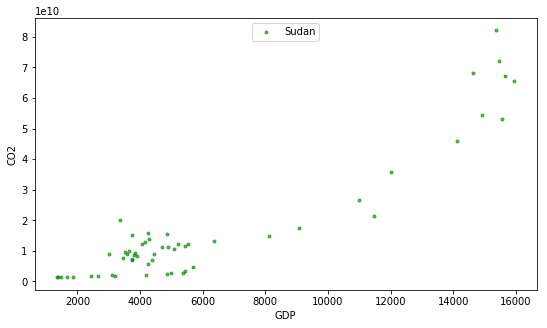

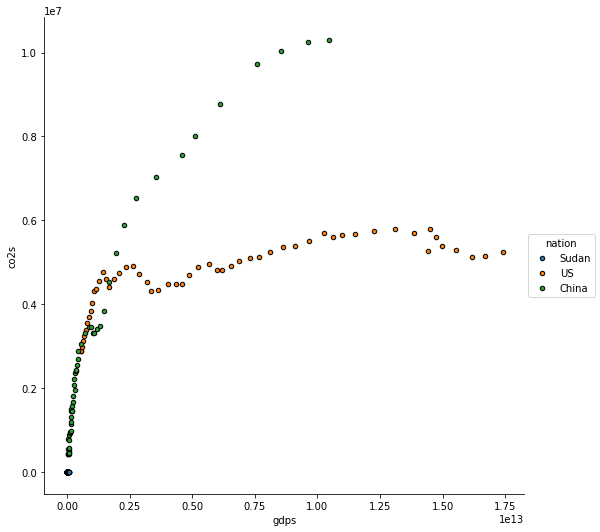

In [284]:
# import pandas as pd  # Import the package
import matplotlib.pyplot as plt
volume = pd.read_stata('./co2gdp.dta')
volume1 = pd.read_stata('./sudan.dta')

fig, ax = plt.subplots(figsize=(9, 5))
gdp=volume1['gdp']
co2=volume1['co2']
ax.plot(co2,gdp, 'g.',label='Sudan',alpha=0.6)
ax.set_xlabel('GDP')
ax.set_ylabel('CO2')
ax.legend(loc='upper center')
plt.show()

import seaborn as sns
import matplotlib.pyplot as plt
g=sns.FacetGrid(volume,hue='nation',size=7.5)
g.map(plt.scatter,'gdps','co2s',s=20,edgecolor='black')
g.add_legend()
plt.show()

The results show that the rise in carbon-dioxide emissions varies from country to country when the GDP expands. More specifically, there are less increase of in developed carbon-dioxide emissions country and more in undeveloped and developing ones.It indicates that a statistically significant result may indicate a problem with heterogeneity. However, our findings are based on descriptive statistics instead of quantative analysis. If more time are allowed, we could do more research on the relationship bewteen the growth of CO2 emissions and the level of development when the GDP expands.